In [19]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from keras.utils import to_categorical

## Import Mnist Dataset

- MNIST is a collection of handwritten digits ranging from the number 0 to 9.

- It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.

In [20]:
train_images_filepath = 'dataset/mnist_dataset/train-images.idx3-ubyte'
train_labels_filepath = 'dataset/mnist_dataset/train-labels.idx1-ubyte'
test_images_filepath = 'dataset/mnist_dataset/t10k-images.idx3-ubyte'
test_labels_filepath = 'dataset/mnist_dataset/t10k-labels.idx1-ubyte'

In [21]:
X_train, y_train = loadlocal_mnist( train_images_filepath, train_labels_filepath)
X_test, y_test = loadlocal_mnist(test_images_filepath, test_labels_filepath)

In [22]:
print("The shape of of X_train: ", X_train.shape)
print("The shape of of y_train: ", y_train.shape)

The shape of of X_train:  (60000, 784)
The shape of of y_train:  (60000,)


In [23]:
print("The shape of of X_test: ", X_test.shape)
print("The shape of of y_test: ", y_test.shape)

The shape of of X_test:  (10000, 784)
The shape of of y_test:  (10000,)


## Data visualization on Minist Dataset

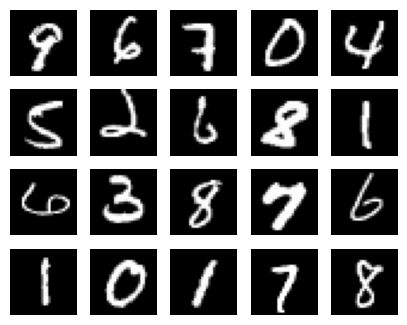

In [24]:
# sample 20 mnist digits from train dataset
x = X_train.reshape(60000, 28, 28)
indexes = np.random.randint(0, x.shape[0], size=20)
images = x[indexes]
labels = y_train[indexes]


# plot the 20 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

In [25]:
# compute the number of labels
num_labels = len(np.unique(y_train))
input_shape = (28, 28)

# Scale images to the [0, 1] range
X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)
print("The shape of of X_test after reshape: ", X_train.shape)
print("The shape of of y_test after reshape: ", X_test.shape)

# convert to one-hot vector
y_train_vector = to_categorical(y_train, num_labels)
y_test_vector = to_categorical(y_test, num_labels)
print("The shape of of X_test after convert to one-hot vector: ", y_train_vector.shape)
print("The shape of of y_test after convert to one-hot vector: ", y_test_vector.shape)

The shape of of X_test after reshape:  (60000, 28, 28)
The shape of of y_test after reshape:  (10000, 28, 28)
The shape of of X_test after convert to one-hot vector:  (60000, 10)
The shape of of y_test after convert to one-hot vector:  (10000, 10)


## Building and Training the Classification ANN

### Importing the Keras libraries and packages

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad

### Creating the ANN

In [27]:
def create_ann_model():
    model = Sequential([
        Flatten(input_shape=(input_shape)),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_labels, activation='sigmoid')
    ])
    return model

## Build and Compare Adam optimizer with other optimizers

In [28]:
def train_ann_model(optimizer, x_train, y_train, x_val, y_val):
    print("Opimizer: ", optimizer)
    model = create_ann_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, validation_split=0.2, verbose=2)
    return model, history

In [29]:
adam_ann_model, adam_ann_history = train_ann_model(Adam(),X_train, y_train_vector,
                                                  X_test, y_test_vector)
rmsprop_ann_model, rmsprop_ann_history = train_ann_model(RMSprop(), X_train, y_train_vector,
                                                         X_test, y_test_vector)
adagrad_ann_model, adagrad_ann_history = train_ann_model(Adagrad(learning_rate=0.01), X_train, y_train_vector,
                                                         X_test, y_test_vector)
sgd_ann_model, sgd_ann_history = train_ann_model(SGD(learning_rate=0.01, nesterov=True), X_train, y_train_vector, 
                                                 X_test, y_test_vector)

Opimizer:  <keras.src.optimizers.adam.Adam object at 0x16b1829d0>
Epoch 1/10
469/469 - 2s - 5ms/step - accuracy: 0.4344 - loss: 7.8894 - val_accuracy: 0.7947 - val_loss: 0.9095
Epoch 2/10
469/469 - 2s - 5ms/step - accuracy: 0.6667 - loss: 1.1870 - val_accuracy: 0.8682 - val_loss: 0.5918
Epoch 3/10
469/469 - 2s - 5ms/step - accuracy: 0.7452 - loss: 0.9120 - val_accuracy: 0.8852 - val_loss: 0.4954
Epoch 4/10
469/469 - 2s - 5ms/step - accuracy: 0.7811 - loss: 0.7894 - val_accuracy: 0.9056 - val_loss: 0.4034
Epoch 5/10
469/469 - 2s - 5ms/step - accuracy: 0.8118 - loss: 0.6898 - val_accuracy: 0.9196 - val_loss: 0.3577
Epoch 6/10
469/469 - 2s - 5ms/step - accuracy: 0.8281 - loss: 0.6361 - val_accuracy: 0.9195 - val_loss: 0.3373
Epoch 7/10
469/469 - 2s - 5ms/step - accuracy: 0.8449 - loss: 0.5807 - val_accuracy: 0.9267 - val_loss: 0.2880
Epoch 8/10
469/469 - 2s - 4ms/step - accuracy: 0.8606 - loss: 0.5255 - val_accuracy: 0.9332 - val_loss: 0.2765
Epoch 9/10
469/469 - 2s - 5ms/step - accuracy:

### Evaluate the model on the test set

In [69]:
loss_adam, acc_adm = adam_ann_model.evaluate(X_test, y_test_vector, batch_size=128)
print("\nTest accuracy of adam: %.1f%%" % (100.0 * acc_adm))
loss_rmsprop, acc_rmsprop = rmsprop_ann_model.evaluate(X_test, y_test_vector, batch_size=128)
print("\nTest accuracy of RMSprop: %.1f%%" % (100.0 * acc_rmsprop))
loss_adagrad, acc_adagrad = adagrad_ann_model.evaluate(X_test, y_test_vector, batch_size=128)
print("\nTest accuracy of adaGrad: %.1f%%" % (100.0 * acc_adagrad))
loss_sgd, acc_sgd = sgd_ann_model.evaluate(X_test, y_test_vector, batch_size=128)
print("\nTest accuracy of SGD: %.1f%%" % (100.0 * acc_sgd))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9288 - loss: 0.2939

Test accuracy of adam: 93.7%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9526 - loss: 0.2076

Test accuracy of RMSprop: 95.9%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9072 - loss: 0.3895

Test accuracy of adaGrad: 92.0%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0922 - loss: nan

Test accuracy of SGD: 9.8%


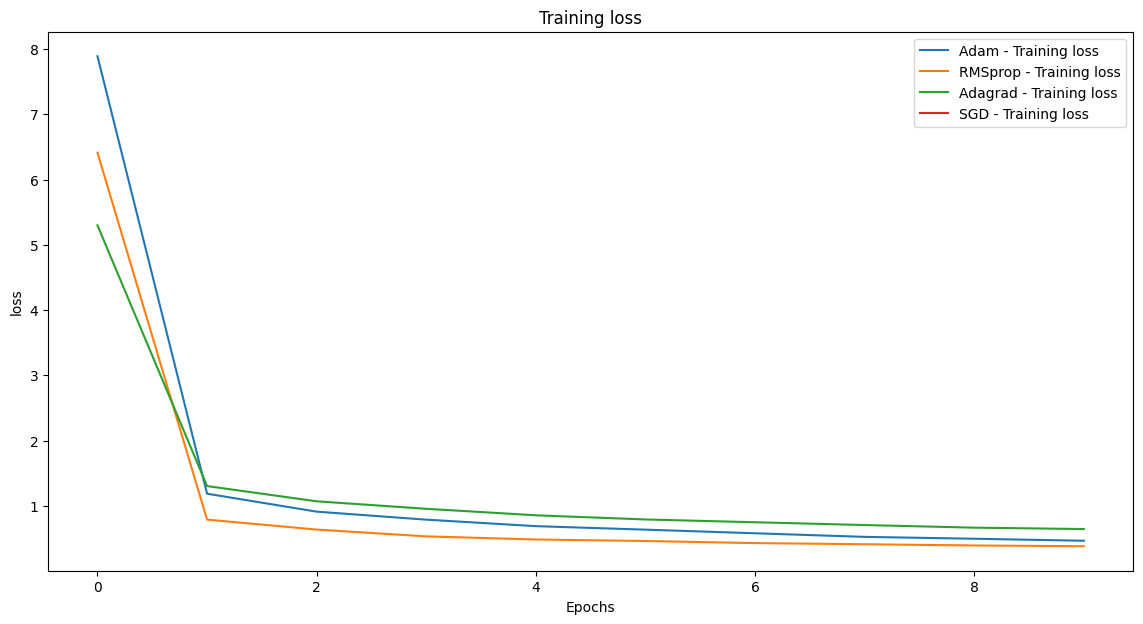

In [46]:
# Function to plot training loss
def plot_loss(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['loss'], label=f'{name} - Training loss')
    
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_ann_history, rmsprop_ann_history, adagrad_ann_history, sgd_ann_history]
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])


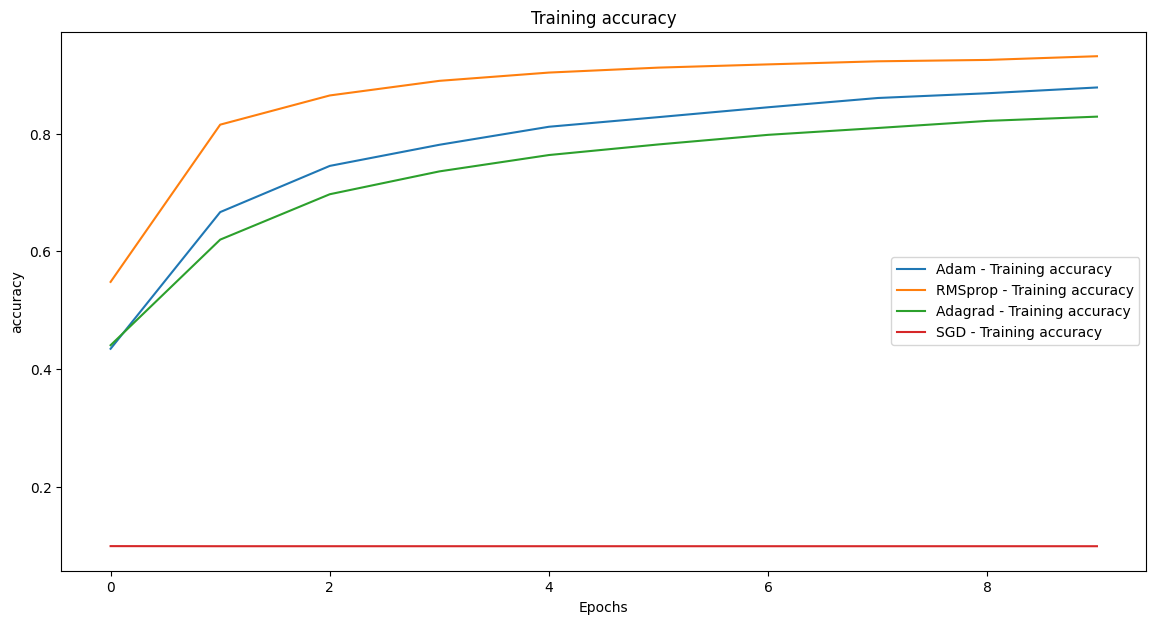

In [47]:
# Function to plot training accuracy
def plot_accuracy(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['accuracy'], label=f'{name} - Training accuracy')
    
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

plot_accuracy(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])

## Import IMDB Dataset of 50K Movie Reviews

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam

In [49]:
df = pd.read_csv("dataset/IMDB_50k_movie_reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [50]:
df.shape

(50000, 2)

In [51]:
df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [52]:
df["review"].head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

### Encode the labels

In [53]:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

### Splitting the dataset into training and testing

In [54]:
X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(X_train_imdb)
X_train_seq = tokenizer.texts_to_sequences(X_train_imdb)
X_test_seq = tokenizer.texts_to_sequences(X_test_imdb)

X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Verify the shape of data
print(X_train_pad.shape, X_test_pad.shape)

(40000, 200) (10000, 200)


### Build the ANN model

In [62]:
def create_ann_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train_pad.shape[1],)),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

## Build and Compare Adam optimizer with other optimizers

In [63]:
def train_ann_model_IMDB(optimizer, x_train, y_train, x_val, y_val):
    print("Opimizer: ", optimizer)
    model = create_ann_model()
    model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, validation_split=0.2, verbose=2)
    return model, history

In [64]:
adam_ann_model_IMDB, adam_ann_history_IMDB = train_ann_model_IMDB(Adam(), X_train_pad, y_train_imdb,
                                                                 X_test_pad, y_test_imdb)
rmsprop_ann_model_IMDB, rmsprop_ann_history_IMDB = train_ann_model_IMDB(RMSprop(), X_train_pad, y_train_imdb,
                                                                        X_test_pad, y_test_imdb)
adagrad_ann_model_IMDB, adagrad_ann_history_IMDB = train_ann_model_IMDB(Adagrad(), X_train_pad, y_train_imdb,
                                                                        X_test_pad, y_test_imdb)
sgd_ann_model_IMDB, sgd_ann_history_IMDB = train_ann_model_IMDB(SGD(), X_train_pad, y_train_imdb,
                                                                X_test_pad, y_test_imdb)

Opimizer:  <keras.src.optimizers.adam.Adam object at 0x35d415070>
Epoch 1/10
313/313 - 1s - 4ms/step - accuracy: 0.4996 - loss: 0.5004 - val_accuracy: 0.5039 - val_loss: 0.4961
Epoch 2/10
313/313 - 1s - 3ms/step - accuracy: 0.4991 - loss: 0.5009 - val_accuracy: 0.5039 - val_loss: 0.4961
Epoch 3/10
313/313 - 1s - 3ms/step - accuracy: 0.4990 - loss: 0.5010 - val_accuracy: 0.5039 - val_loss: 0.4961
Epoch 4/10
313/313 - 1s - 3ms/step - accuracy: 0.4990 - loss: 0.5010 - val_accuracy: 0.5039 - val_loss: 0.4961
Epoch 5/10
313/313 - 1s - 3ms/step - accuracy: 0.4990 - loss: 0.5010 - val_accuracy: 0.5039 - val_loss: 0.4961
Epoch 6/10
313/313 - 1s - 3ms/step - accuracy: 0.4990 - loss: 0.5010 - val_accuracy: 0.5039 - val_loss: 0.4961
Epoch 7/10
313/313 - 1s - 3ms/step - accuracy: 0.4990 - loss: 0.5010 - val_accuracy: 0.5039 - val_loss: 0.4961
Epoch 8/10
313/313 - 1s - 3ms/step - accuracy: 0.4990 - loss: 0.5010 - val_accuracy: 0.5039 - val_loss: 0.4961
Epoch 9/10
313/313 - 1s - 3ms/step - accuracy:

### Evaluate the model on the test set

In [65]:
loss_adm, acc_adm = adam_ann_model_IMDB.evaluate(X_test_pad, y_test_imdb, batch_size=32)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_adm))
loss_rmsprop, acc_rmsprop = rmsprop_ann_model_IMDB.evaluate(X_test_pad, y_test_imdb, batch_size=32)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_rmsprop))
loss_adagrad, acc_adagrad = adagrad_ann_model_IMDB.evaluate(X_test_pad, y_test_imdb, batch_size=32)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_adagrad))
loss_sgd, acc_sgd = sgd_ann_model_IMDB.evaluate(X_test_pad, y_test_imdb, batch_size=32)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_sgd))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.5022 - loss: 0.4978

Test accuracy: 50.4%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.4978 - loss: 0.5022

Test accuracy: 49.6%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.4841 - loss: 0.5157

Test accuracy: 49.3%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.5022 - loss: 0.4978

Test accuracy: 50.4%


In [66]:
print(adam_ann_history_IMDB)

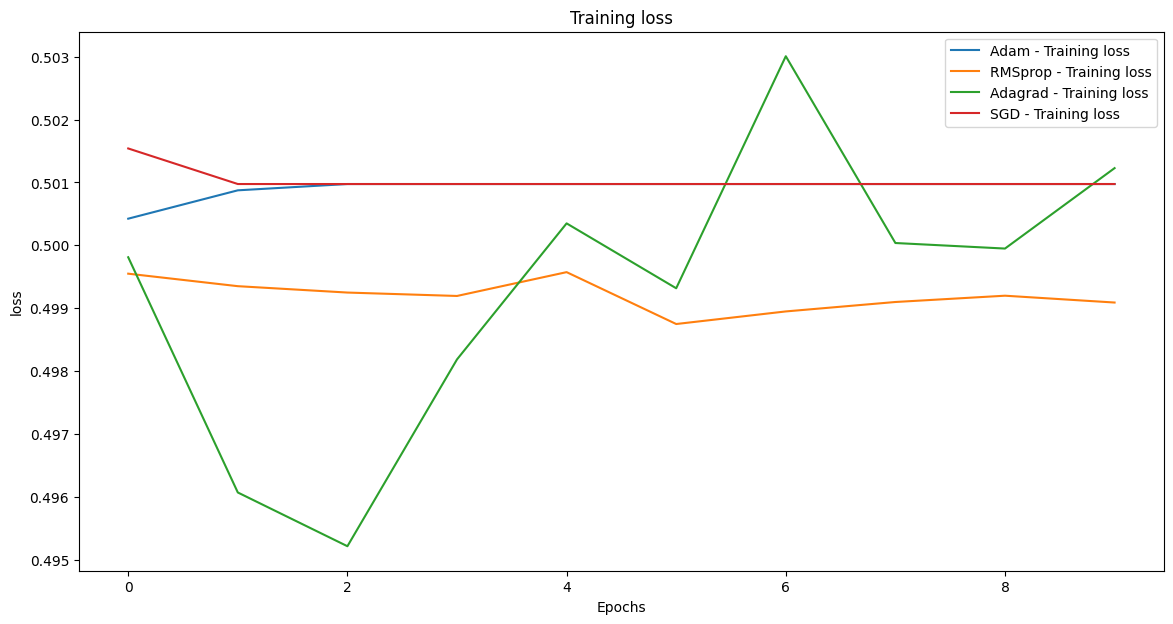

In [67]:
histories_IMDB = [adam_ann_history_IMDB, rmsprop_ann_history_IMDB, adagrad_ann_history_IMDB, sgd_ann_history_IMDB]
plot_loss(histories_IMDB, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])

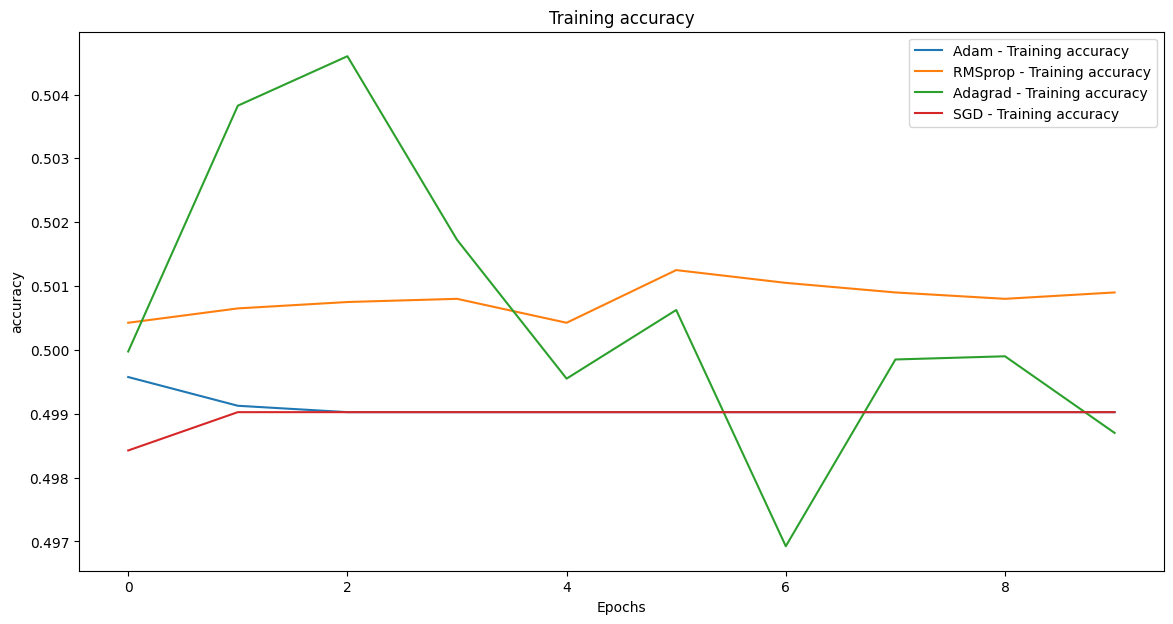

In [68]:
plot_accuracy(histories_IMDB, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])